In [1]:
import pandas as pd
from utils import generate_random_sales


In [2]:
# 1. Générer les dates pour 12 mois (2025)
dates = pd.date_range(start='2025-01-01', end='2025-12-01', freq='MS')

# 2. Générer les ventes aléatoires pour chaque produit
sales_A = generate_random_sales(50, 100, 12)
sales_B = generate_random_sales(30, 80, 12)
sales_C = generate_random_sales(20, 60, 12)
sales_D = generate_random_sales(10, 50, 12)


In [3]:
# Créer le DataFrame
df_initial = pd.DataFrame({
    "Date": dates,
    "Product_A": sales_A,
    "Product_B": sales_B,
    "Product_C": sales_C,
    "Product_D": sales_D
})

# Afficher le tableau
df_initial


,Date,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,68,51,30,47
1,2025-02-01,61,39,33,27
2,2025-03-01,100,78,20,32
3,2025-04-01,77,57,44,13
4,2025-05-01,67,74,20,50
5,2025-06-01,97,48,35,16
6,2025-07-01,86,49,45,42
7,2025-08-01,67,61,44,48
8,2025-09-01,51,77,28,18
9,2025-10-01,84,77,46,40


In [4]:
# Sauvegarder le DataFrame dans le dossier data/
df_initial.to_csv("data/initial.csv", index=False)
print("initial.csv créé / !")


initial.csv créé / !


In [5]:
import pandas as pd
df = pd.read_csv("data/initial.csv")
df.head()


,Date,Product_A,Product_B,Product_C,Product_D
0,2025-01-01,68,51,30,47
1,2025-02-01,61,39,33,27
2,2025-03-01,100,78,20,32
3,2025-04-01,77,57,44,13
4,2025-05-01,67,74,20,50


In [6]:
# Total des ventes pour chaque mois (somme des 4 produits)
df['Total_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].sum(axis=1)

# Moyenne des ventes par mois
df['Average_Sales'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].mean(axis=1)

df.head()


,Date,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales
0,2025-01-01,68,51,30,47,196,49.00
1,2025-02-01,61,39,33,27,160,40.00
2,2025-03-01,100,78,20,32,230,57.50
3,2025-04-01,77,57,44,13,191,47.75
4,2025-05-01,67,74,20,50,211,52.75


In [7]:
# Convertir la colonne Date en datetime si ce n'est pas déjà fait
df['Date'] = pd.to_datetime(df['Date'])

# Fonction pour attribuer le trimestre
def get_quarter(month):
    if month in [1, 2, 3]:
        return 'Q1'
    elif month in [4, 5, 6]:
        return 'Q2'
    elif month in [7, 8, 9]:
        return 'Q3'
    else:
        return 'Q4'

df['Quarter'] = df['Date'].dt.month.apply(get_quarter)
df.head()


,Date,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Quarter
0,2025-01-01,68,51,30,47,196,49.00,Q1
1,2025-02-01,61,39,33,27,160,40.00,Q1
2,2025-03-01,100,78,20,32,230,57.50,Q1
3,2025-04-01,77,57,44,13,191,47.75,Q2
4,2025-05-01,67,74,20,50,211,52.75,Q2


In [8]:
# Produit avec le maximum de ventes chaque mois
df['Max_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmax(axis=1)

# Produit avec le minimum de ventes chaque mois
df['Min_Sales_Product'] = df[['Product_A', 'Product_B', 'Product_C', 'Product_D']].idxmin(axis=1)

df.head()


,Date,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,68,51,30,47,196,49.00,Q1,Product_A,Product_C
1,2025-02-01,61,39,33,27,160,40.00,Q1,Product_A,Product_D
2,2025-03-01,100,78,20,32,230,57.50,Q1,Product_A,Product_C
3,2025-04-01,77,57,44,13,191,47.75,Q2,Product_A,Product_D
4,2025-05-01,67,74,20,50,211,52.75,Q2,Product_B,Product_C


In [9]:
df.to_csv("data/final.csv", index=False)
print("final.csv créé avec succès dans le dossier data/ !")


final.csv créé avec succès dans le dossier data/ !


In [10]:
import pandas as pd
df = pd.read_csv("data/final.csv")
df.head()


,Date,Product_A,Product_B,Product_C,Product_D,Total_Sales,Average_Sales,Quarter,Max_Sales_Product,Min_Sales_Product
0,2025-01-01,68,51,30,47,196,49.00,Q1,Product_A,Product_C
1,2025-02-01,61,39,33,27,160,40.00,Q1,Product_A,Product_D
2,2025-03-01,100,78,20,32,230,57.50,Q1,Product_A,Product_C
3,2025-04-01,77,57,44,13,191,47.75,Q2,Product_A,Product_D
4,2025-05-01,67,74,20,50,211,52.75,Q2,Product_B,Product_C


In [11]:
# Pivot table pour moyenne des ventes par trimestre et par produit
pivot_avg = pd.pivot_table(
    df,
    index='Quarter',
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Total_Sales'],
    aggfunc='mean'
).round(2)
pivot_avg


,Product_A,Product_B,Product_C,Product_D,Total_Sales
Quarter,,,,,
Q1,76.33,56.00,27.67,35.33,195.33
Q2,80.33,59.67,33.00,26.33,199.33
Q3,68.00,62.33,39.00,36.00,205.33
Q4,79.67,53.67,45.00,37.00,215.33


In [12]:
# Total des ventes par trimestre
pivot_total = pd.pivot_table(
    df,
    index='Quarter',
    values=['Product_A', 'Product_B', 'Product_C', 'Product_D', 'Total_Sales'],
    aggfunc='sum'
)
pivot_total

,Product_A,Product_B,Product_C,Product_D,Total_Sales
Quarter,,,,,
Q1,229,168,83,106,586
Q2,241,179,99,79,598
Q3,204,187,117,108,616
Q4,239,161,135,111,646


In [13]:
# On peut sauvegarder les deux pivot tables dans un seul CSV
with pd.ExcelWriter("data/output.xlsx") as writer:
    pivot_avg.to_excel(writer, sheet_name='Average_Sales')
    pivot_total.to_excel(writer, sheet_name='Total_Sales')

print("output.xlsx créé avec succès dans data/ !")


output.xlsx créé avec succès dans data/ !


In [14]:
pivot_avg.to_csv("data/pivot_avg.csv")
pivot_total.to_csv("data/pivot_total.csv")

In [15]:
# Meilleur mois
best_month_row = df.loc[df['Total_Sales'].idxmax()]
best_month = best_month_row['Date']
best_month_sales = best_month_row['Total_Sales']

print(f"Meilleur mois : {best_month} avec Total Sales = {best_month_sales}")


Meilleur mois : 2025-10-01 avec Total Sales = 247


In [16]:
# Somme annuelle par produit
total_per_product = df[['Product_A','Product_B','Product_C','Product_D']].sum()
best_product = total_per_product.idxmax()
best_product_sales = total_per_product.max()

print(f"Meilleur produit : {best_product} avec ventes annuelles = {best_product_sales}")


Meilleur produit : Product_A avec ventes annuelles = 913


In [17]:
# Somme des ventes par trimestre
sales_per_quarter = df.groupby('Quarter')['Total_Sales'].sum()
best_quarter = sales_per_quarter.idxmax()
best_quarter_sales = sales_per_quarter.max()
print(f"Meilleur trimestre : {best_quarter} avec Total Sales = {best_quarter_sales}")

Meilleur trimestre : Q4 avec Total Sales = 646


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# Pour des graphiques plus jolis
sns.set_style("whitegrid")

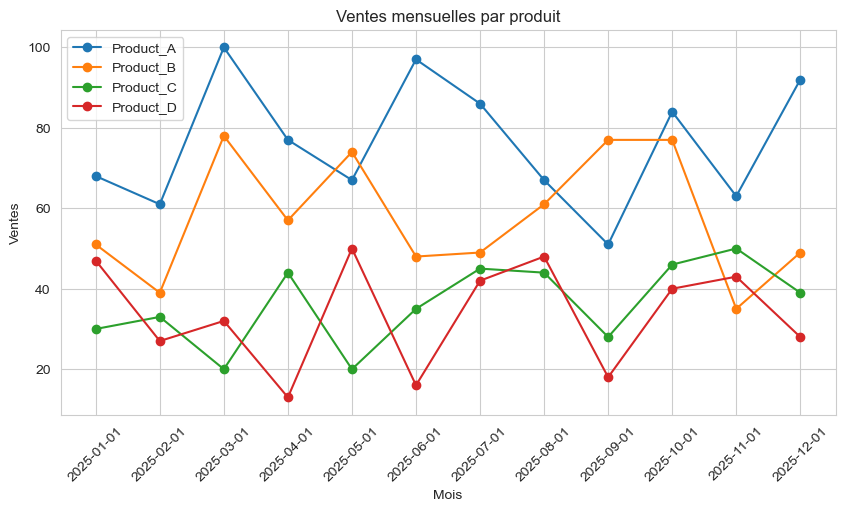

In [19]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Product_A'], marker='o', label='Product_A')
plt.plot(df['Date'], df['Product_B'], marker='o', label='Product_B')
plt.plot(df['Date'], df['Product_C'], marker='o', label='Product_C')
plt.plot(df['Date'], df['Product_D'], marker='o', label='Product_D')

plt.title("Ventes mensuelles par produit")
plt.xlabel("Mois")
plt.ylabel("Ventes")
plt.xticks(rotation=45)
plt.legend()
plt.show()


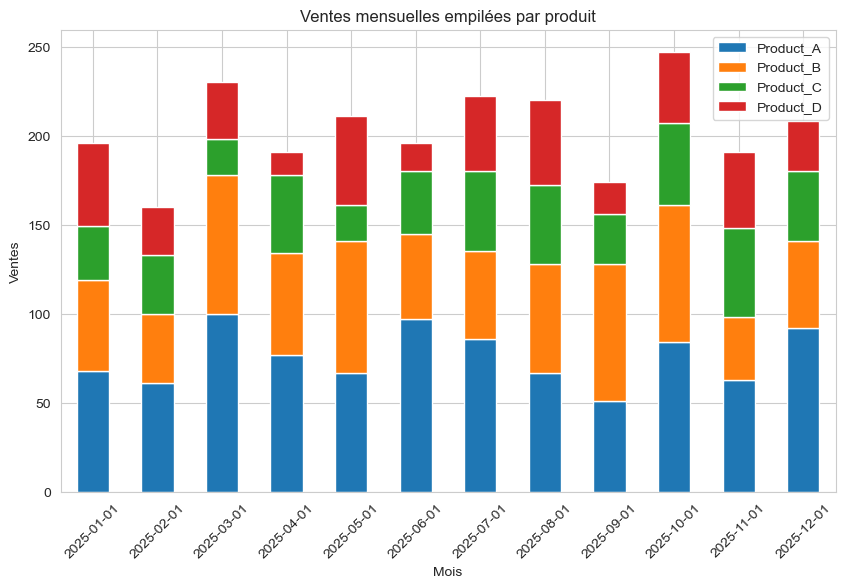

In [20]:
df.plot(x='Date', 
        y=['Product_A','Product_B','Product_C','Product_D'], 
        kind='bar', stacked=True, figsize=(10,6))

plt.title("Ventes mensuelles empilées par produit")
plt.xlabel("Mois")
plt.ylabel("Ventes")
plt.xticks(rotation=45)
plt.show()


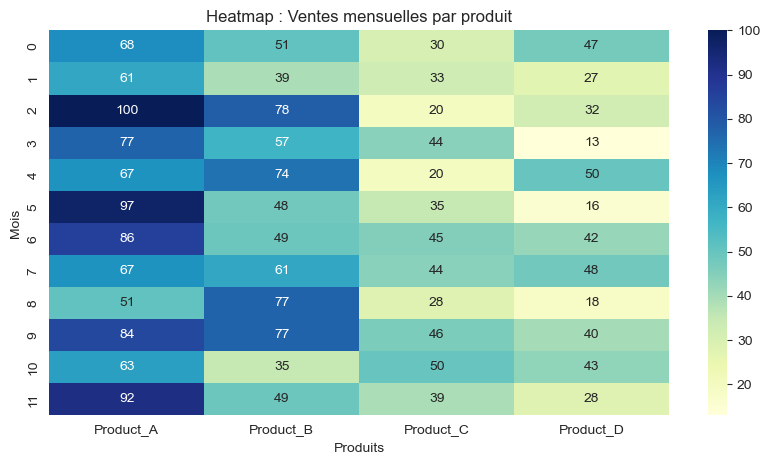

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df[['Product_A','Product_B','Product_C','Product_D']], 
            annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap : Ventes mensuelles par produit")
plt.xlabel("Produits")
plt.ylabel("Mois")
plt.show()

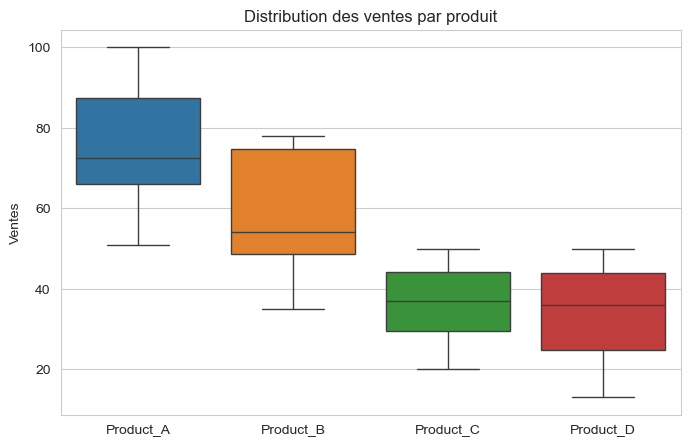

In [22]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['Product_A','Product_B','Product_C','Product_D']])
plt.title("Distribution des ventes par produit")
plt.ylabel("Ventes")
plt.show()
